In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [2]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight* X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":10})

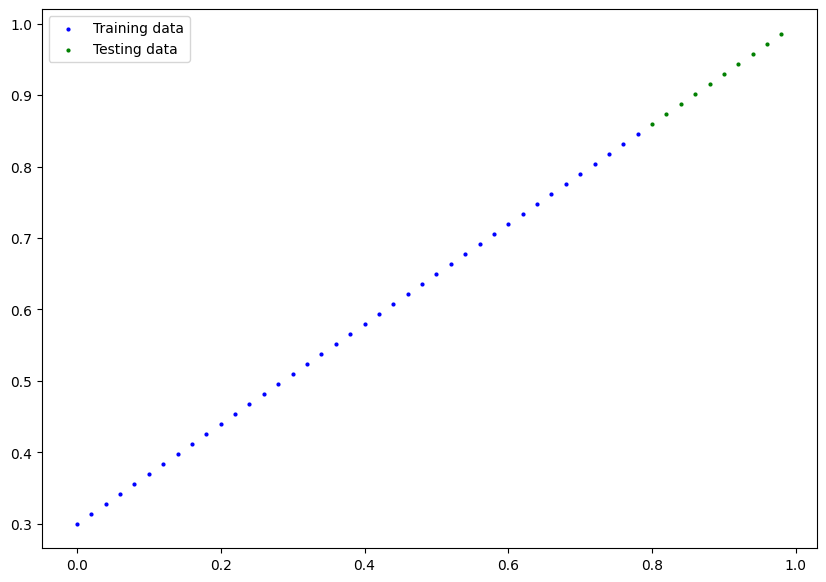

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights* x + self.bias

In [9]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [10]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [12]:
weight, bias

(0.7, 0.3)

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]], grad_fn=<AddBackward0>)

In [14]:
with torch.inference_mode():
  y_preds = model_0(X_test)

#with torch.no_grad():
 # y_preds = model_0(X_test)
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

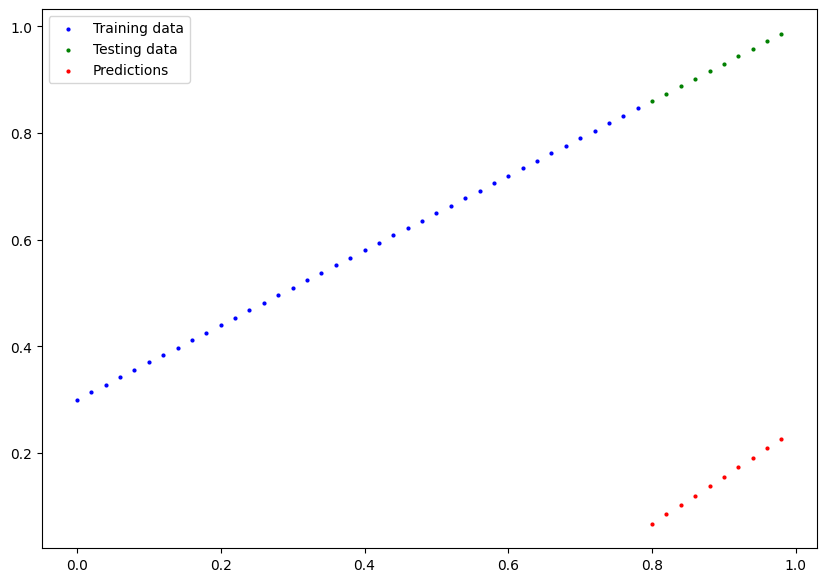

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [18]:
with torch.no_grad():
  print(list(model_0.parameters()))

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([-0.6382], requires_grad=True)]


In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [20]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [21]:
loss_fn

L1Loss()

Building a training loop

In [22]:
torch.manual_seed(42)
epochs = 150 #0.one loop through the data - hyperparameter (set by us)

#Tack different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"loss: {loss}")

   #3. Optimizer
  optimizer.zero_grad()

  #4. perform backpropagation
  loss.backward()

  #Step the optimizer
  optimizer.step()

  model_0.eval() ## turns off gradient descent
  with torch.inference_mode():
  #with torch.no_grad():
    test_pred = model_0(X_test)

    #test loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")
  print(model_0.state_dict())

Epoch 0 | Loss: 0.8670692443847656 | Test Loss: 0.7624635696411133
OrderedDict([('weights', tensor([0.8862])), ('bias', tensor([-0.6282]))])
OrderedDict([('weights', tensor([0.8901])), ('bias', tensor([-0.6182]))])
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([-0.6082]))])
OrderedDict([('weights', tensor([0.8979])), ('bias', tensor([-0.5982]))])
OrderedDict([('weights', tensor([0.9018])), ('bias', tensor([-0.5882]))])
OrderedDict([('weights', tensor([0.9057])), ('bias', tensor([-0.5782]))])
OrderedDict([('weights', tensor([0.9096])), ('bias', tensor([-0.5682]))])
OrderedDict([('weights', tensor([0.9135])), ('bias', tensor([-0.5582]))])
OrderedDict([('weights', tensor([0.9174])), ('bias', tensor([-0.5482]))])
OrderedDict([('weights', tensor([0.9213])), ('bias', tensor([-0.5382]))])
Epoch 10 | Loss: 0.7518593072891235 | Test Loss: 0.6277537941932678
OrderedDict([('weights', tensor([0.9252])), ('bias', tensor([-0.5282]))])
OrderedDict([('weights', tensor([0.9291])), ('bias'

In [23]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.86706924, 0.7518593 , 0.6366495 , 0.52143955, 0.40622944,
        0.2910192 , 0.17580903, 0.11110418, 0.09491372, 0.08829215,
        0.08408288, 0.08055474, 0.07702664, 0.07355018, 0.07011998],
       dtype=float32),
 [tensor(0.7625),
  tensor(0.6278),
  tensor(0.4930),
  tensor(0.3583),
  tensor(0.2236),
  tensor(0.0889),
  tensor(0.0458),
  tensor(0.1338),
  tensor(0.1699),
  tensor(0.1840),
  tensor(0.1861),
  tensor(0.1820),
  tensor(0.1778),
  tensor(0.1709),
  tensor(0.1633)])

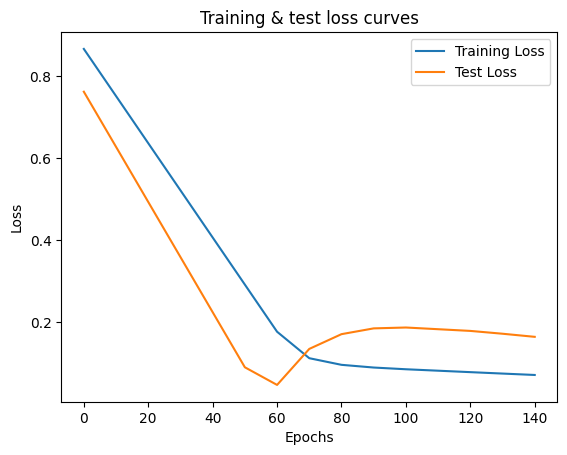

In [24]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training & test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [25]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [26]:
weight, bias

(0.7, 0.3)

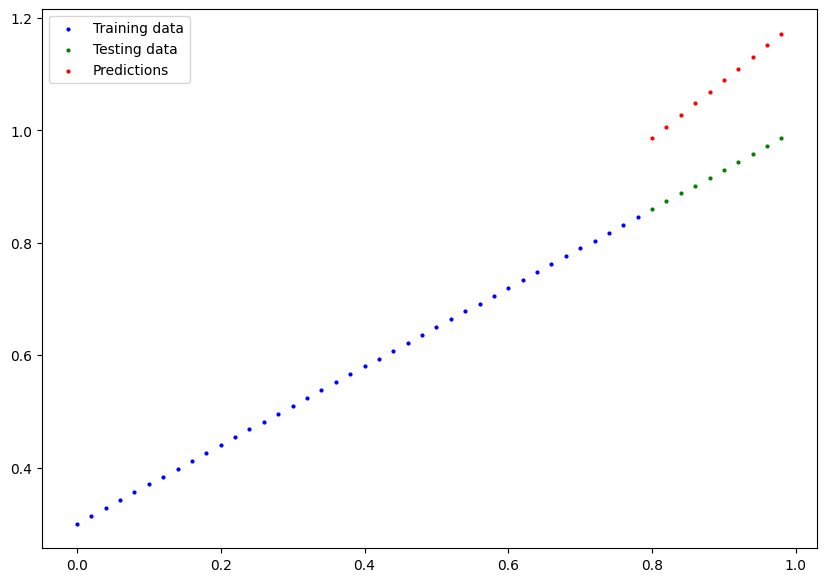

In [27]:
plot_predictions(predictions=y_preds_new)

Saving the model in PyTorch
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0318])), ('bias', tensor([0.1608]))])

In [29]:
#Saving PyTorch Model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_o.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3 save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_o.pth


In [30]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Dec 21 14:01 01_pytorch_workflow_model_o.pth


In [31]:
model_1 = torch.load(MODEL_SAVE_PATH)
model_1

OrderedDict([('weights', tensor([1.0318])), ('bias', tensor([0.1608]))])

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0318])), ('bias', tensor([0.1608]))])

In [33]:
loaded_model_0 = LinearRegressionModel()

#Load teh saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [34]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([1.0318])), ('bias', tensor([0.1608]))])

In [35]:
#Make some predictions with our loaded models
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)
y_preds

tensor([[0.9863],
        [1.0069],
        [1.0276],
        [1.0482],
        [1.0688],
        [1.0895],
        [1.1101],
        [1.1308],
        [1.1514],
        [1.1720]])

In [36]:
y_preds == loaded_model_preds

NameError: ignored

##6. putting all together


6.1 Data

In [ ]:
#Import PyTorch & matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


6.1 Data

In [38]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

#x & y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [40]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

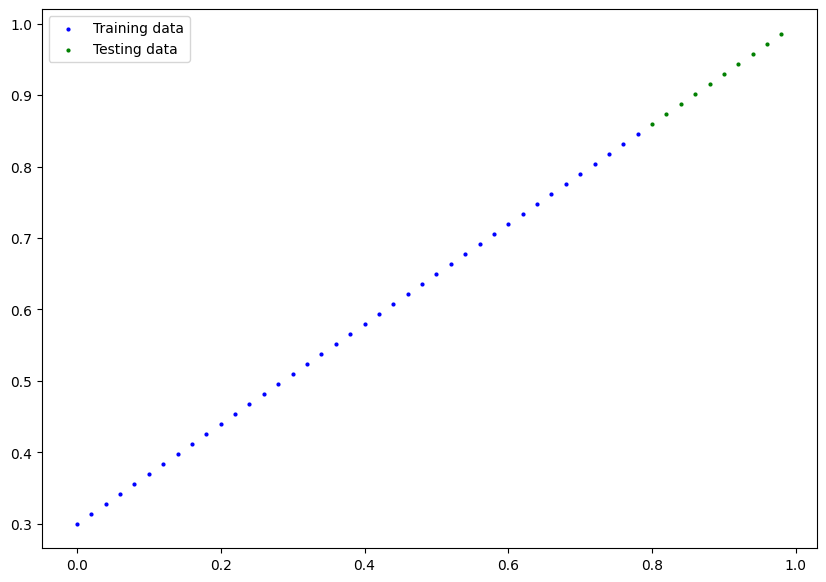

In [41]:
plot_predictions(X_train, y_train, X_test, y_test)

building a model

In [44]:
#Linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [45]:
device

'cpu'

In [46]:
next(model_1.parameters()).device

device(type='cpu')

In [48]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [49]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [57]:
torch.manual_seed(42)

epochs = 200
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

##Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [58]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [59]:
weight, bias

(0.7, 0.3)

In [60]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

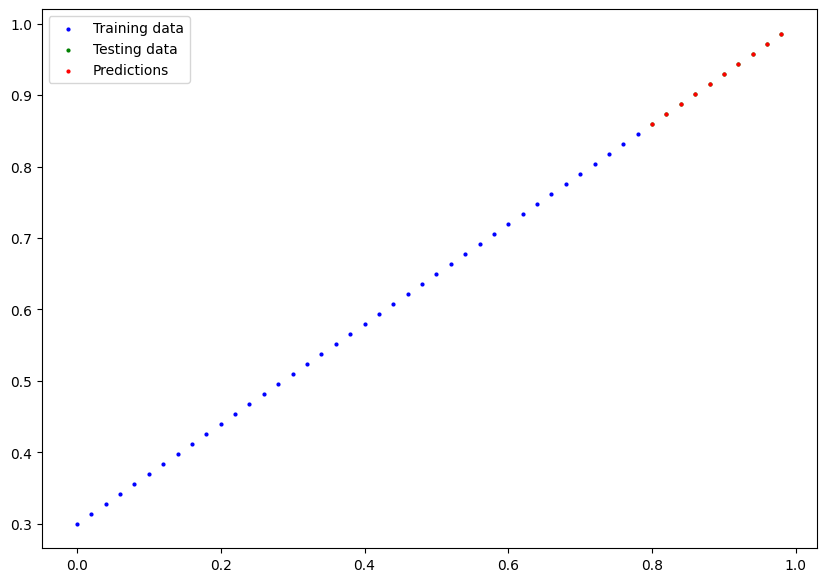

In [62]:
plot_predictions(predictions=y_preds.cpu())

In [66]:
from pathlib import Path
#1. create models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create save path
MODEL_NAME = "01_Pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save modelstate dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: Models/01_Pytorch_workflow_model_1.pth


In [69]:
#Load a PYtorch mdel
loaded_model_1 = LinearRegressionModelV2()

#Load the model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [70]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [71]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [72]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])